# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=hobart
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=ushuaia
Processing Record 3 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=jamestown
Processing Record 4 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=atuona
Processing Record 5 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=qaanaaq
Processing Record 6 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=touros
Processing Record 7 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9

Processing Record 57 | Eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=eyl
Processing Record 58 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=new norfolk
Processing Record 59 | Sai Buri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=sai buri
City not found. Skipping...
Processing Record 60 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=tasiilaq
Processing Record 61 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=clyde river
Processing Record 62 | Kyzyl-Suu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=kyzyl-suu
Processing Record 63 | San Jeronimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 113 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=longyearbyen
Processing Record 114 | Maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=maningrida
Processing Record 115 | San Marcos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=san marcos
Processing Record 116 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=hithadhoo
Processing Record 117 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=bredasdorp
Processing Record 118 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=carnarvon
Processing Record 119 | Dolores Hidalgo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 169 | Boyabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=boyabat
Processing Record 170 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=pevek
Processing Record 171 | Tchibanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=tchibanga
Processing Record 172 | Sainte-Rose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=sainte-rose
Processing Record 173 | Lalmohan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=lalmohan
Processing Record 174 | Sergeyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=sergeyevka
Processing Record 175 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd2

City not found. Skipping...
Processing Record 224 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=ponta do sol
Processing Record 225 | Dabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=dabat
City not found. Skipping...
Processing Record 226 | Bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=bayir
City not found. Skipping...
City not found. Skipping...
Processing Record 227 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=waingapu
Processing Record 228 | Santiago del Estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=santiago del estero
Processing Record 229 | Tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=tabuk
Proces

Processing Record 279 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=prince rupert
Processing Record 280 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=shimoda
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 281 | Zvishavane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=zvishavane
Processing Record 282 | Sirsilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=sirsilla
Processing Record 283 | Muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=muravlenko
Processing Record 284 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=poum
Processing Record 285 | Yaan
http://ap

Processing Record 334 | Deori Khas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=deori khas
Processing Record 335 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=cap malheureux
Processing Record 336 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=ambilobe
Processing Record 337 | Sidney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=sidney
City not found. Skipping...
City not found. Skipping...
Processing Record 338 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=qasigiannguit
Processing Record 339 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=inuvik
Processing Record 340 | Umba
http://api.openweathermap.o

City not found. Skipping...
Processing Record 389 | Sulangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=sulangan
Processing Record 390 | Dongsheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=dongsheng
City not found. Skipping...
Processing Record 391 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=namatanai
Processing Record 392 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=haines junction
Processing Record 393 | Puerto Armuelles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=puerto armuelles
Processing Record 394 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=los llanos de aridane
Processing Rec

Processing Record 444 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=margate
Processing Record 445 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=yar-sale
Processing Record 446 | Reconquista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=reconquista
Processing Record 447 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=chicama
Processing Record 448 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=aykhal
Processing Record 449 | Dzilam Gonzalez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=dzilam gonzalez
Processing Record 450 | Berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051

Processing Record 501 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=bonthe
City not found. Skipping...
Processing Record 502 | Santa Isabel do Rio Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=santa isabel do rio negro
Processing Record 503 | Kanniyakumari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=kanniyakumari
Processing Record 504 | Accra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=accra
Processing Record 505 | Nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=nioro
Processing Record 506 | Canoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9325eadf051c88751b9dd23d47e4a0d&q=canoa
City not found. Skipping...
Processing Record 507 | Baijiantan
http://api.openwe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create a dictonary with lists
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from the dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [13]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,0,AU,1551301039,82,-42.88,147.33,55.40,5.82
1,Ushuaia,75,AR,1551297600,87,-54.81,-68.31,50.00,28.86
2,Jamestown,0,AU,1551301282,66,-33.21,138.60,64.75,8.75
3,Atuona,32,PF,1551301284,100,-9.80,-139.03,80.68,5.17
4,Qaanaaq,0,GL,1551301285,81,77.48,-69.36,-19.22,2.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

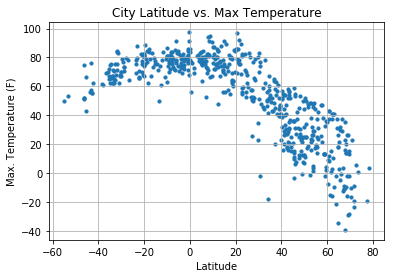

In [8]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Graph titles and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

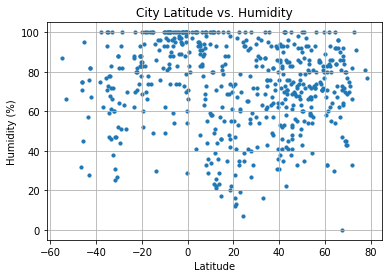

In [9]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Graph title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity_Plot.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

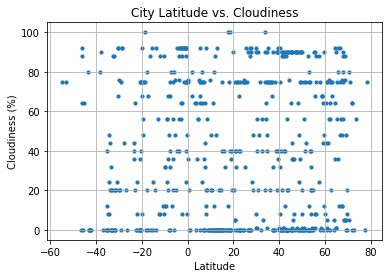

In [10]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Graph title and labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness_Plot.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

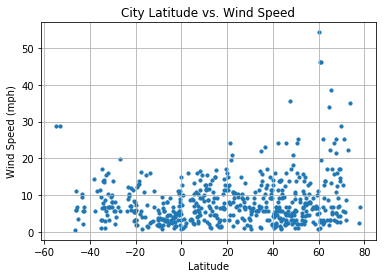

In [11]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Graph title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind_Speed_Plot.png")

# Show plot
plt.show()
